1-1. 載入所需的套件 pandas, matplotlib, numpy, 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'HanWangHeiHeavy' # 設定字型檔讓 matplotlib 使用
import collections
import seaborn as sns
%matplotlib inline

1-2. 載入資料學測資料檔 exam_my.csv 存為變數 exam

In [42]:
exam = pd.read_csv('exam_my.csv')
exam.head(2)

,QID,代號,來源,類別,年份,題型,題號,題目簡述,答案,章節,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
0,NaN,sdczk-my091-1-01ax,指考數乙091,指考數乙,91,單選,1,四次方程勘根,(D),msadx 多項式,...,0.0,1.0,2.0,94.0,1.0,5.0,10.0,19.0,28.0,5.0
1,NaN,sdczk-my091-1-02ax,指考數乙091,指考數乙,91,單選,2,所得滿意度調查,(C),msckx 數學綜合概念,...,1.0,0.0,96.0,1.0,1.0,4.0,4.0,68.0,12.0,7.0


1-3. 刪除 QID 欄，且將代號設為 index

In [43]:
del exam["QID"]

In [44]:
exam = exam.set_index(["代號"])
exam.head(2)

,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,P,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
代號,,,,,,,,,,,,,,,,,,,,,
sdczk-my091-1-01ax,指考數乙091,指考數乙,91,單選,1,四次方程勘根,(D),msadx 多項式,NaN,65.0,...,0.0,1.0,2.0,94.0,1.0,5.0,10.0,19.0,28.0,5.0
sdczk-my091-1-02ax,指考數乙091,指考數乙,91,單選,2,所得滿意度調查,(C),msckx 數學綜合概念,NaN,84.0,...,1.0,0.0,96.0,1.0,1.0,4.0,4.0,68.0,12.0,7.0


2.1 分別計算 單選, 多選, 填充的數量

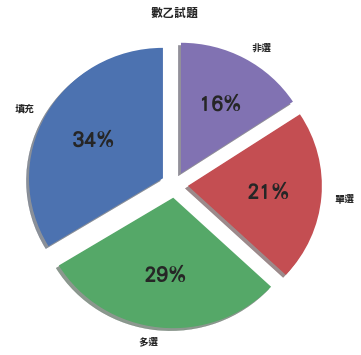

In [45]:
exam.head(2)
quesType = exam["題型"]
quesTypeCounts = quesType.value_counts()
quesTypeCounts.head()
plt.figure(figsize=(6,6))
font = {'size':20}
matplotlib.rc('font',**font)
plt.pie(quesTypeCounts,labels = quesTypeCounts.index, 
       autopct="%2.0f%%",shadow=True,startangle=90,
        explode=(0.1,0.1,0.1,0.1))
plt.title(u"數乙試題")

In [46]:
exambyYearType = exam.groupby(["來源","題型"]).count().iloc[:,0:1]
exambyYearType.columns.values[0]="題數"
exambyYearType.head(6)

題數
來源      題型    
指考數乙091 單選   2
        填充   6
        非選   3
指考數乙092 單選   4
        填充   8
        多選   4

In [47]:
exambyYearType.unstack().T

來源     指考數乙091  指考數乙092  指考數乙093  指考數乙094  指考數乙095  指考數乙096  指考數乙097  指考數乙098  \
   題型                                                                           
題數 單選      2.0      4.0      4.0      2.0      3.0      3.0      3.0      2.0   
   填充      6.0      8.0      5.0      5.0      3.0      3.0      3.0      4.0   
   多選      NaN      4.0      2.0      2.0      4.0      4.0      4.0      4.0   
   非選      3.0      NaN      2.0      2.0      2.0      2.0      2.0      2.0   

來源     指考數乙099  指考數乙100  指考數乙101  指考數乙102  指考數乙103  指考數乙104  指考數乙105  
   題型                                                                 
題數 單選      2.0      2.0      3.0      2.0      2.0      2.0      3.0  
   填充      6.0      4.0      3.0      3.0      3.0      3.0      3.0  
   多選      2.0      4.0      4.0      5.0      5.0      5.0      5.0  
   非選      2.0      2.0      2.0      2.0      2.0      2.0      2.0

In [48]:
ansRatebyType = exam.groupby("題型").mean().round(2)
ansRatebyType.iloc[:,1:12]

,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,T,D
題型,,,,,,,,,,,
單選,59.90,80.92,61.95,36.82,85.62,72.05,62.13,50.41,29.51,NaN,44.10
填充,44.55,74.32,44.05,15.27,81.37,60.44,44.11,27.27,9.34,NaN,59.05
多選,50.89,75.22,51.30,26.15,80.65,64.61,51.22,37.89,19.87,35.96,49.07
非選,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


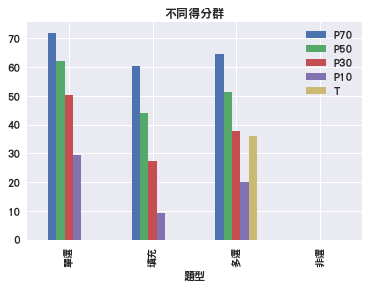

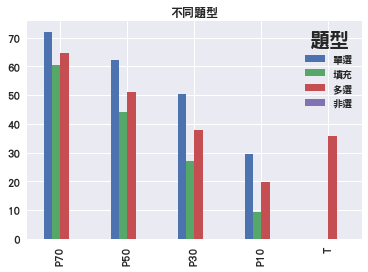

In [49]:
ansRatebyTypeGroup5 =  ansRatebyType.iloc[:,6:11]
ansRatebyTypeGroup5
ansRatebyTypeGroup5.plot.bar(title="不同得分群")
ansRatebyTypeGroup5.T.plot.bar(title="不同題型")

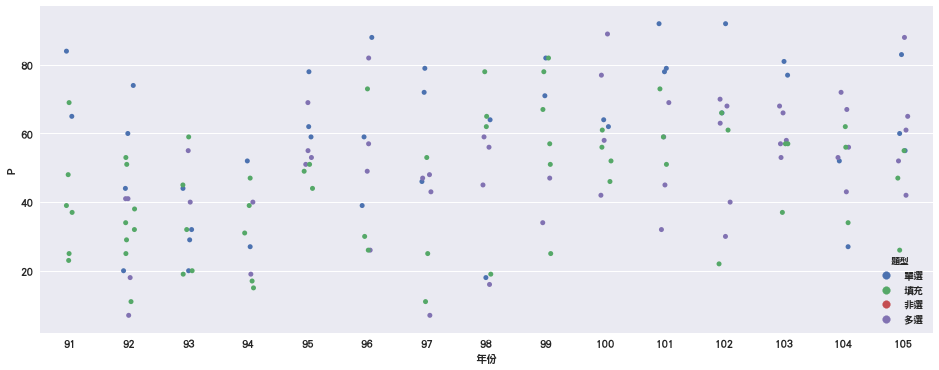

In [75]:
plt.figure(figsize=(16,6))
sns.stripplot(x="年份",y="P",data=exam,hue="題型",jitter=True)

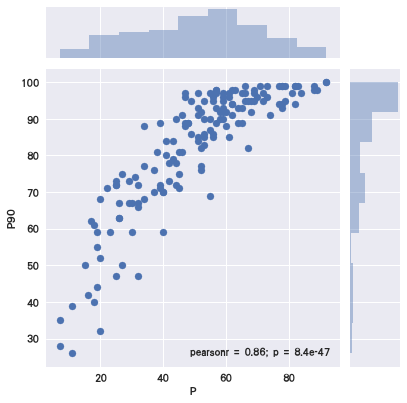

In [51]:
sns.jointplot(x="P",y="P90",data=exam)

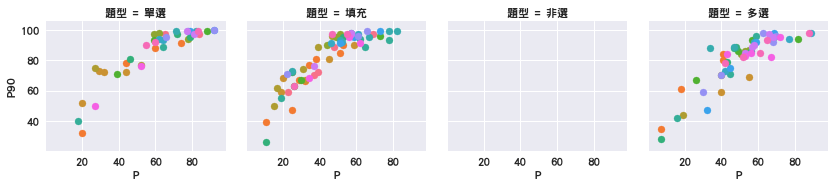

In [52]:
g = sns.FacetGrid(exam,col="題型",hue="年份")
g.map(plt.scatter,"P","P90")

將 單選, 多選, 填充 分成三個表 singCho, multCho, textBox

In [71]:
singCho = exam[exam["題型"].isin(['單選'])]
multCho = exam[exam["題型"] =='多選']
textBox = exam[exam.題型.isin(['填充'])]
exnonCho= exam[exam["題型"] !='非選']

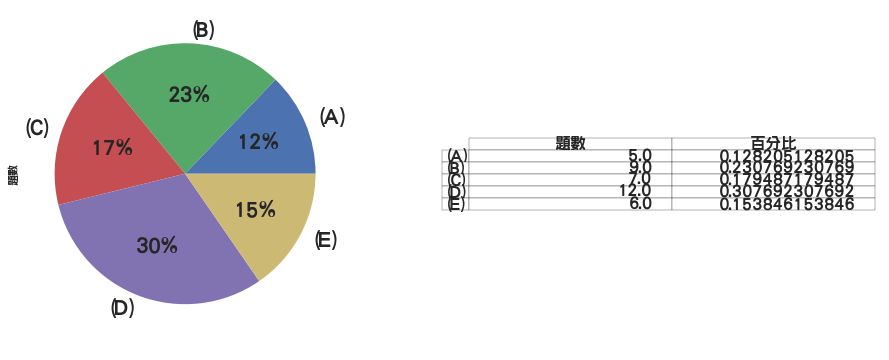

In [55]:
singChoAns = singCho[["答案","P"]].groupby(by = "答案").count()
singChoAns.columns.values[0]="題數"
singChoAns["百分比"]= singChoAns["題數"]/len(singCho)
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121,aspect="equal")
singChoAns.plot(kind='pie',y="題數",ax=ax1, autopct="%2d%%",fontsize = 20,legend=False)
ax2 = plt.subplot(122)
plt.axis("off")
from pandas.tools.plotting import table
tbl = table(ax2,singChoAns,loc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(16)
plt.show()

In [56]:
singCho.describe()

,年份,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,97.538462,59.897436,80.923077,61.948718,36.820513,85.615385,72.051282,62.128205,50.410256,29.512821,...,13.538462,21.487179,18.948718,27.128205,14.205128,10.923077,17.948718,23.487179,21.000000,13.666667
std,4.429840,21.320604,19.728932,26.108023,21.403236,17.363930,24.525978,26.243976,25.102650,19.488015,...,28.739159,35.023204,32.600411,37.132890,29.643655,10.032538,15.423749,19.458284,16.288517,15.239031
min,91.000000,18.000000,28.000000,12.000000,2.000000,32.000000,20.000000,13.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,4.000000,2.000000
25%,93.500000,45.000000,70.000000,45.000000,22.500000,76.500000,56.000000,43.500000,32.500000,17.500000,...,0.500000,1.000000,1.500000,1.000000,1.000000,4.000000,8.000000,13.000000,11.000000,5.000000
50%,97.000000,62.000000,89.000000,65.000000,34.000000,93.000000,82.000000,67.000000,50.000000,22.000000,...,1.000000,2.000000,4.000000,4.000000,2.000000,8.000000,11.000000,18.000000,16.000000,7.000000
75%,101.000000,78.000000,95.500000,83.000000,53.000000,97.500000,92.000000,83.500000,74.000000,43.500000,...,4.000000,19.500000,11.500000,65.000000,4.500000,12.000000,24.500000,23.000000,26.500000,17.500000
max,105.000000,92.000000,99.000000,97.000000,81.000000,100.000000,99.000000,97.000000,95.000000,75.000000,...,97.000000,99.000000,99.000000,98.000000,98.000000,39.000000,80.000000,81.000000,66.000000,72.000000


In [57]:
multChoAns = multCho[["答案","P"]].groupby(by = "答案").count()
multChoAns.columns.values[0]="題數"
multChoAns.sort_values("題數",ascending=False)

,題數
答案,
(B)(C),6
(A)(B)(E),5
(B)(D),4
(A)(D),4
(B),3
(D)(E),3
(A)(C)(D),3
(A)(B)(C),2
(C)(E),2


In [58]:
multChoAns.reset_index(inplace=True)
multChoAns["答案個數"]=multChoAns["答案"].apply(lambda x: round(len(x)/3),0)
multChoAnsNum = multChoAns.groupby("答案個數").sum()
multChoAnsNum["百分比"]=multChoAnsNum["題數"]/len(multCho)
multChoAnsNum

,題數,百分比
答案個數,,
1,5,0.092593
2,27,0.500000
3,18,0.333333
4,4,0.074074


計算三種題型在不同群體的答對率

In [64]:
exambyChapter = exam.groupby("章節")
exambyChapter = exambyChapter.agg({"來源":"count","P":"mean","Ph":"mean","Pm":"mean","Pl":"mean","P90":"mean"})
exambyChapter.sort_values(by="來源",ascending=False)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msadx 多項式,21,55.058824,81.235294,57.058824,26.882353,86.352941
mssjy 直線與圓,17,51.833333,78.666667,53.500000,23.333333,84.166667
msdtj 統計,17,48.823529,68.882353,49.705882,27.882353,73.705882
msajt 指數與對數,16,44.285714,72.928571,41.928571,18.000000,80.571429
msdjl 機率,16,49.625000,70.437500,49.187500,29.250000,76.500000
msdpc 排列組合與記數原理,15,55.133333,80.333333,56.800000,28.266667,85.266667
msckx 數學綜合概念,13,64.666667,82.666667,66.111111,45.222222,87.222222
msdsp 隨機變數,11,58.714286,85.142857,63.714286,27.285714,89.285714
msajz 矩陣與方程組,9,49.333333,80.500000,49.500000,18.000000,86.666667


In [63]:
exambyChapter.sort_values(by="P90",ascending=True)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
mscswj1 公式的理解與解讀,1,11.000000,28.000000,5.000000,0.000000,39.000000
msdtj 統計,17,48.823529,68.882353,49.705882,27.882353,73.705882
msnsl 數列與遞迴,4,37.250000,66.000000,35.000000,10.750000,74.000000
msdjl 機率,16,49.625000,70.437500,49.187500,29.250000,76.500000
msajt 指數與對數,16,44.285714,72.928571,41.928571,18.000000,80.571429
msskx 空間向量,9,43.666667,73.555556,40.888889,16.555556,81.333333
msseq 二次曲線,6,48.800000,76.600000,52.000000,17.800000,81.800000
msssj 三角函數,9,41.444444,74.666667,39.777778,9.888889,82.333333
msalm 極限,4,52.500000,78.750000,52.500000,26.250000,83.500000


/Users/acchu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


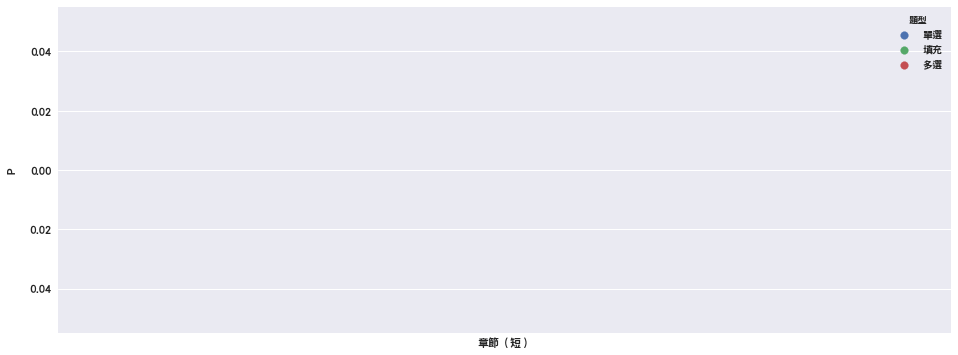

In [74]:
plt.figure(figsize=(16,6))
font = {'size':24}
matplotlib.rc('font',**font)
sns.stripplot(x="章節（短）",y="P",data=exnonCho,hue="題型",jitter=True)

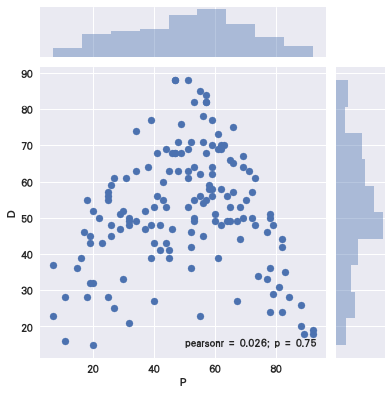

In [66]:
sns.jointplot(x="P",y="D",data=exam)

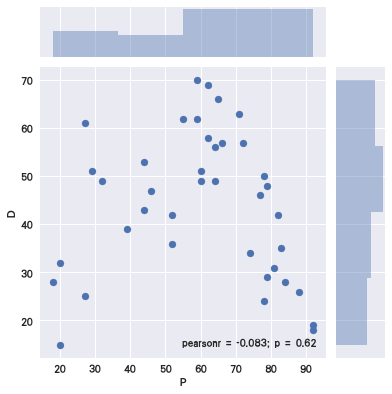

In [67]:
sns.jointplot(x="P",y="D",data=singCho)

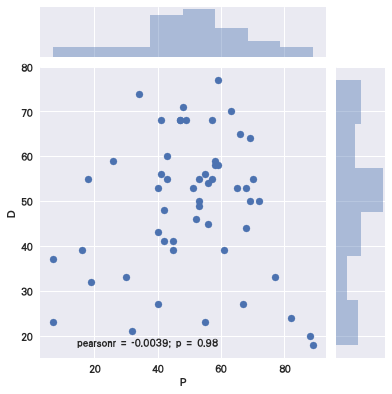

In [68]:
sns.jointplot(x="P",y="D",data=multCho)

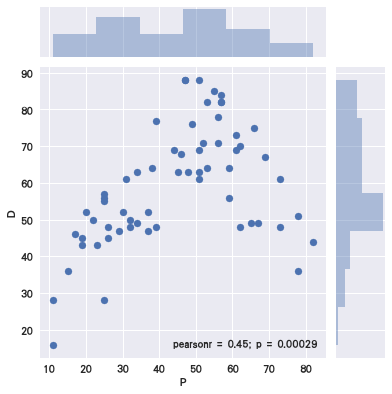

In [69]:
sns.jointplot(x="P",y="D",data=textBox)